 datos en http://medata.gov.co/sites/default/files/medata_harvest_files/intoxicacion_por_sustancias_psicoactivas.csv

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
color='#fdb550'

In [2]:
df = pd.read_csv("http://medata.gov.co/sites/default/files/medata_harvest_files/intoxicacion_por_sustancias_psicoactivas.csv", sep=";")

In [3]:
df.columns = [c.replace("sivigila_datosbasicos.","") for c in df.columns]

In [4]:
df = df[df["year_"]==2018]

In [5]:
df.head()

,id,semana,edad_,uni_med_,sexo_,nombre_barrio,comuna,tipo_ss_,cod_ase_,fec_con_,ini_sin_,tip_cas_,pac_hos_,evento,year_
3684,104591,33,13.0,1,F,Aures No.1,Robledo,C,EPS010,12/08/2018,11/08/2018,4,2,INTOXICACION POR SUSTANCIAS PSICOACTIVAS,2018
3685,104704,25,57.0,1,M,Los Angeles,La Candelaria,C,EPS002,22/06/2018,07/06/2018,4,1,INTOXICACION POR SUSTANCIAS PSICOACTIVAS,2018
3686,104736,8,26.0,1,M,San Antonio de Prado,San Antonio de Prado,S,EPSS40,18/02/2018,18/02/2018,4,1,INTOXICACION POR SUSTANCIAS PSICOACTIVAS,2018
3687,104872,25,23.0,1,M,La Pradera,San Javier,C,EPS002,20/06/2018,01/01/1900,4,2,INTOXICACION POR SUSTANCIAS PSICOACTIVAS,2018
3688,104893,28,31.0,1,F,Area de Expansion Pajarito,Corregimiento de San Cristobal,S,EPSS40,12/07/2018,12/07/2018,4,2,INTOXICACION POR SUSTANCIAS PSICOACTIVAS,2018


In [6]:
comunas_cuenta = df.groupby("comuna").size().to_frame("cuenta").sort_values("cuenta", ascending=False).reset_index()

In [7]:
comunas_cuenta.head()

,comuna,cuenta
0,El Poblado,80
1,Robledo,58
2,Manrique,51
3,Belen,46
4,Popular,44


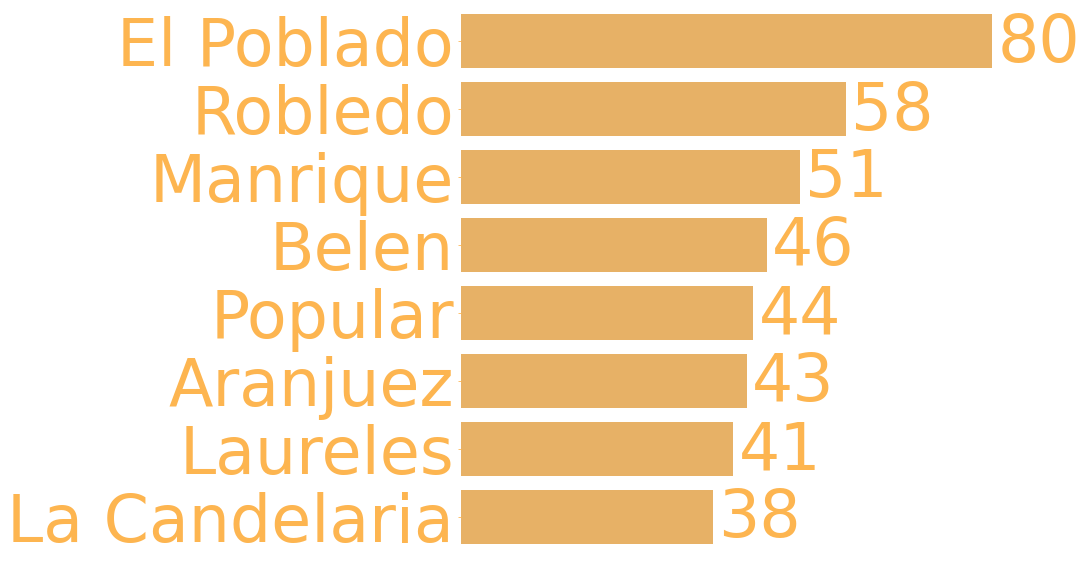

In [8]:
plt.figure(figsize=(10,10))
ax = sns.barplot(x="cuenta", y="comuna", orient="h", data=comunas_cuenta.head(8), color=color)

plt.grid(False)

ax.set_xlabel("", fontsize=30)
plt.xticks([])
plt.box(False)
ax.set_ylabel("", fontsize=30)

ax.tick_params(axis='y',which = "major", colors=color)



# jugar con estos valores
vertical_offset = 0.3
horizontal_offset = 7

ax.tick_params(axis='both', which='major', labelsize=65)
for index, row in comunas_cuenta.head(8).iterrows():
    ax.text(row["cuenta"] + horizontal_offset,index+vertical_offset, # posicion
            row["cuenta"], # texto
            color=color, 
            ha="center", 
            size=65)
    
plt.savefig(f'comunas_psico.png',bbox_inches='tight', transparent="True", pad_inches = 0)
plt.show()

In [9]:
df_male = df[df["sexo_"] == "M "]
df_female = df[df["sexo_"] == "F "]

m_cont = df_male.groupby(pd.cut(df_male["edad_"], np.arange(0, 100, 10))).size().to_frame("Hombres")
f_cont = df_female.groupby(pd.cut(df_female["edad_"], np.arange(0, 100, 10))).size().to_frame("Mujeres")

piramide = m_cont.join(f_cont).reset_index()

piramide["Hombres"] = -piramide["Hombres"]

piramide.head()

,edad_,Hombres,Mujeres
0,"(0, 10]",-5,5
1,"(10, 20]",-78,70
2,"(20, 30]",-180,77
3,"(30, 40]",-137,36
4,"(40, 50]",-53,20


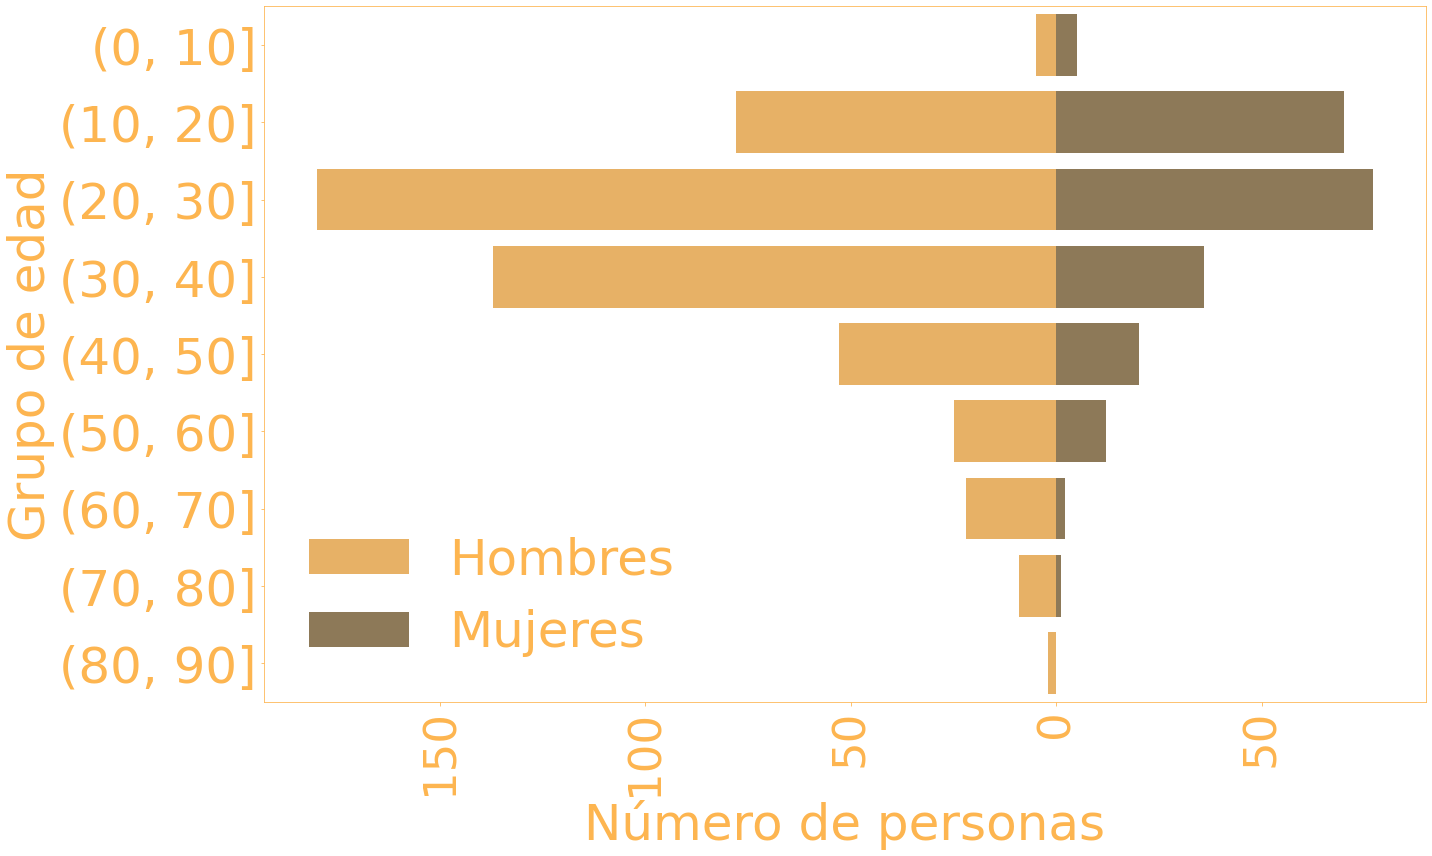

In [15]:
plt.figure(figsize=(20,12))
ax = sns.barplot(x="Hombres",y="edad_", color=color, label="Hombres",data = piramide)

ax = sns.barplot(x="Mujeres",y="edad_", color="#967B4F", label="Mujeres",data = piramide)

plt.setp(ax.spines.values(), color=color)


ax.tick_params(axis='x',which = "major", colors=color, labelsize=35, labelrotation=90)
ax.tick_params(axis='y', colors=color, labelsize=45)

ax.set_xlabel("Número de personas", fontsize=50, color=color)
ax.set_ylabel("Grupo de edad", fontsize=50, color=color)


plt.xticks(fontsize=45)
plt.yticks(fontsize=50)

ax.set_xticklabels(np.abs(list(ax.get_xticks())).astype(int))
legend = plt.legend(framealpha=0.0, fontsize=5)
plt.setp(legend.get_texts(), color=color)

plt.tight_layout()
plt.savefig(f'piramide.png',bbox_inches='tight', transparent="True", pad_inches = 0)

plt.show()